In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
import warnings
warnings.simplefilter('ignore')

In [7]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [8]:
house_data=pd.read_csv(r'C:\Users\tt172\Pictures\house-prices-advanced-regression-techniques\train.csv')
house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [9]:
#GET A BASIC SUMMARY OF THE DATA DISTRIBUTION 
from ydata_profiling import ProfileReport
profile = ProfileReport(house_data, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
house_data.shape

(1460, 81)

In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

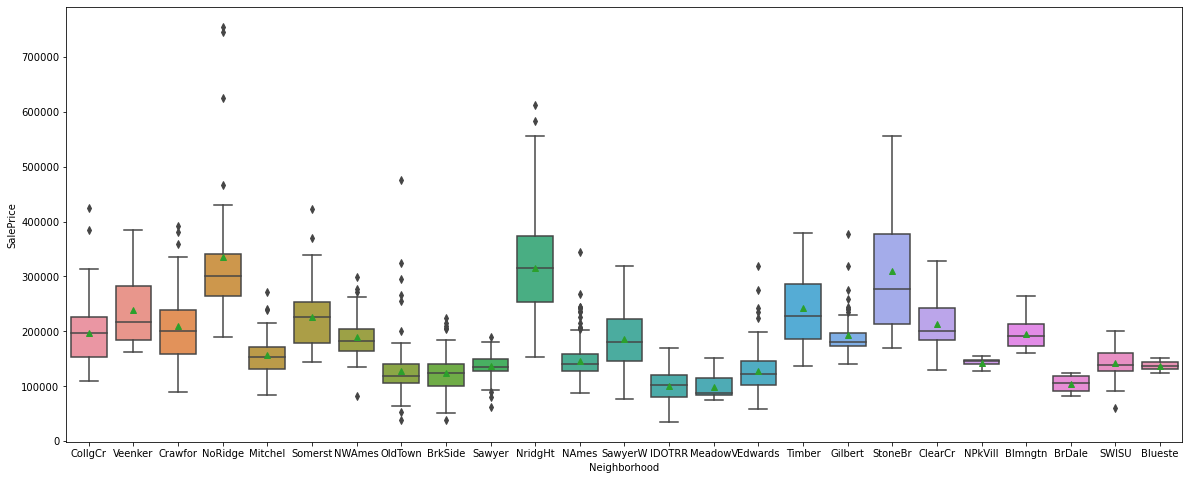

In [30]:
plt.figure(figsize=(20,8))
sns.boxplot(house_data, y='SalePrice', x='Neighborhood', showmeans=True)

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

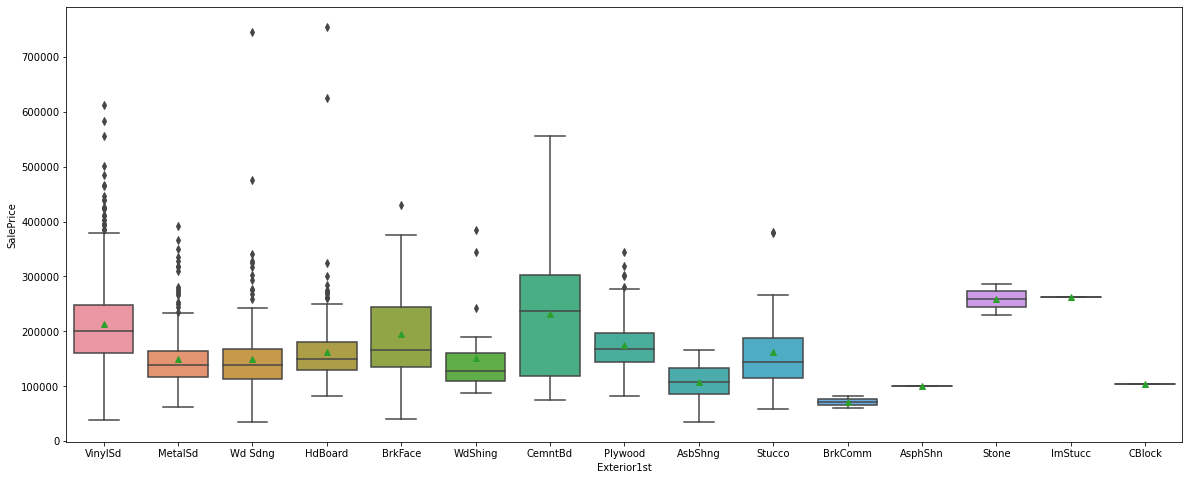

In [13]:
plt.figure(figsize=(20,8))
sns.boxplot(house_data, y='SalePrice', x='Exterior1st', showmeans=True)

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

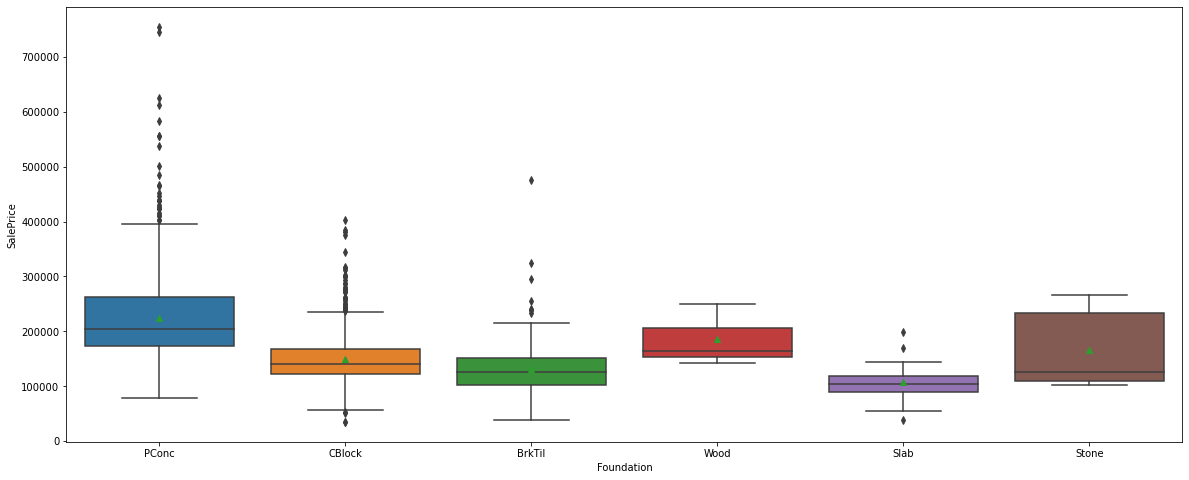

In [1063]:
plt.figure(figsize=(20,8))
sns.boxplot(house_data, y='SalePrice', x='Foundation', showmeans=True)

<AxesSubplot:>

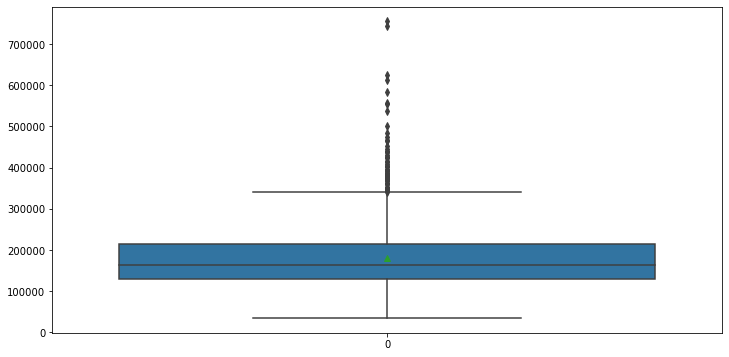

In [1068]:
plt.figure(figsize=(12,6))
sns.boxplot(house_data['SalePrice'], showmeans=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

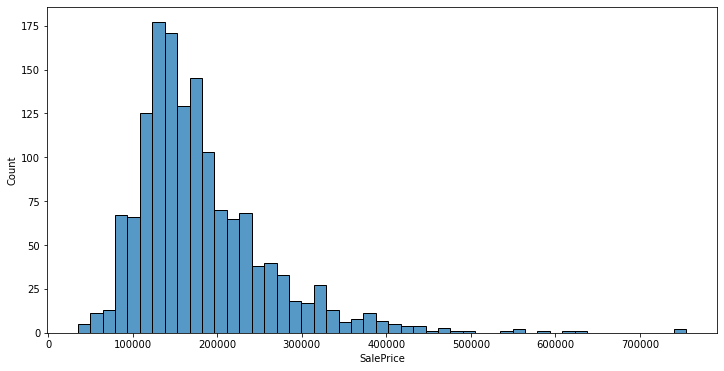

In [1069]:
plt.figure(figsize=(12,6))
sns.histplot(house_data['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

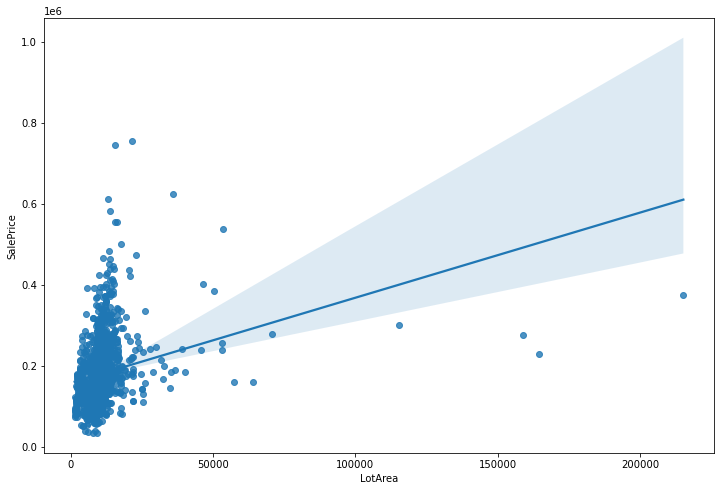

In [1070]:
plt.figure(figsize=(12,8))
sns.regplot(house_data,y='SalePrice', x='LotArea')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

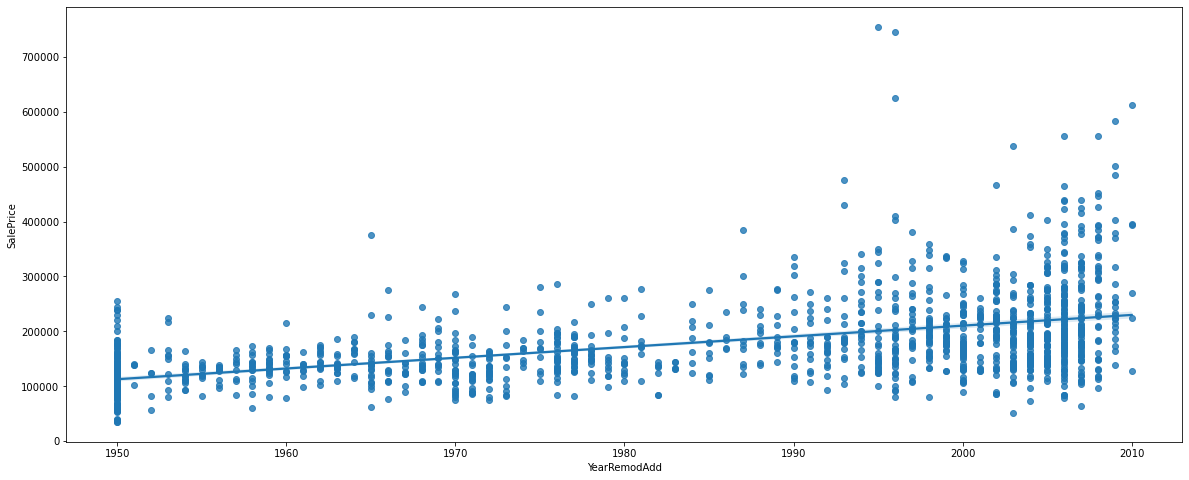

In [44]:
plt.figure(figsize=(20,8))
sns.regplot(house_data,y='SalePrice', x='YearRemodAdd')

In [31]:
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [32]:
null_value_percentage=house_data.isnull().sum()*100/len(house_data)

In [33]:
print(round(null_value_percentage,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [34]:
# DROP COLUMNS WITH NULL VALUE ABOVE 45%
house_data=house_data.drop(columns=['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','Id'])

In [35]:
house_data.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
586,30,RL,55.0,10267,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,1Fam,1Story,6,7,1918,2000,Gable,CompShg,Stucco,Wd Shng,None,0.0,TA,Gd,BrkTil,TA,Gd,Mn,Rec,210,ALQ,606,0,816,GasA,Ex,Y,SBrkr,838,0,0,838,1,0,1,0,2,1,Fa,5,Typ,0,Detchd,1961.0,Fin,1,275,TA,TA,N,0,0,112,0,0,0,0,5,2008,WD,Normal,130000
625,20,RL,87.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1962,1962,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,261.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1116,1116,GasA,TA,Y,SBrkr,1116,0,0,1116,0,0,1,1,3,1,TA,5,Typ,0,Attchd,1962.0,Unf,2,440,TA,TA,Y,0,0,0,0,385,0,0,2,2010,WD,Normal,160000
516,80,RL,NaN,10448,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,6,6,1972,1972,Gable,CompShg,HdBoard,HdBoard,BrkFace,333.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,689,689,GasA,TA,Y,SBrkr,1378,741,0,2119,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1972.0,RFn,2,583,TA,TA,Y,0,104,0,0,0,0,0,8,2009,COD,Abnorml,158000
856,80,RL,NaN,10970,Pave,IR1,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,SLvl,6,6,1978,1978,Gable,CompShg,Plywood,HdBoard,None,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,505,LwQ,435,0,940,GasA,TA,Y,SBrkr,1026,0,0,1026,1,0,1,0,3,1,TA,5,Typ,0,Detchd,1981.0,Unf,2,576,TA,Fa,Y,0,0,34,0,0,0,0,10,2008,WD,Normal,147000
20,60,RL,101.0,14215,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,0,11,2006,New,Partial,325300


In [36]:
house_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [37]:
#FEATURES SELECTION
corrmat=house_data.corr()

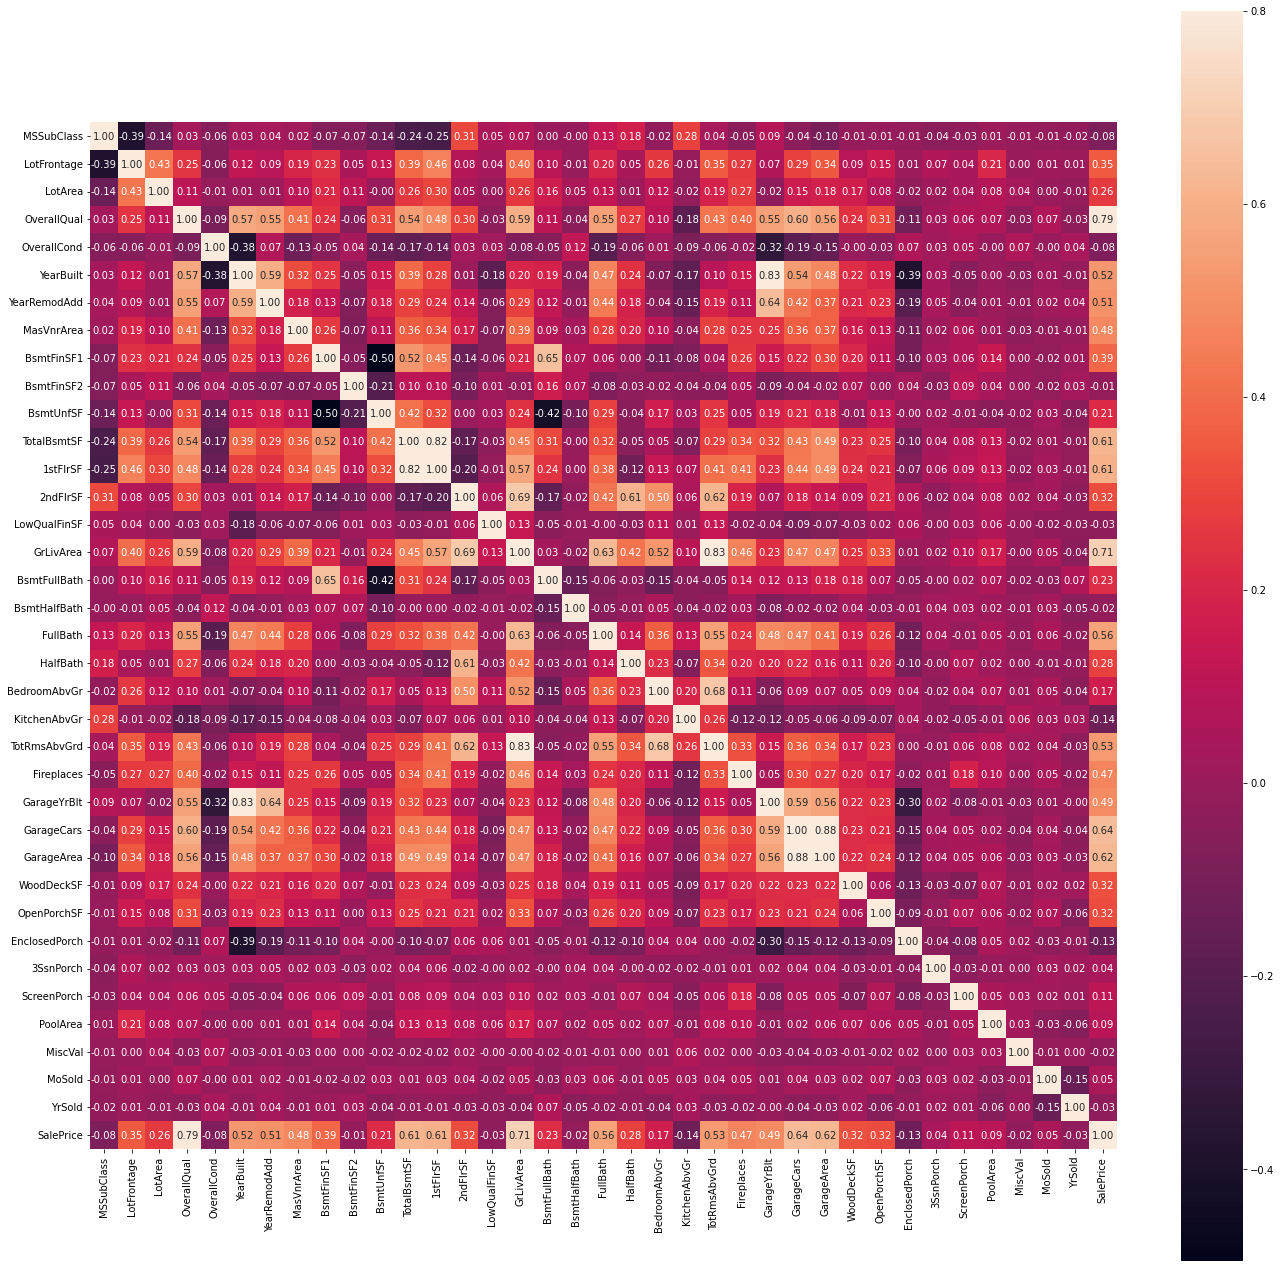

In [38]:
f, ax=plt.subplots(figsize=(23,23))
sns.heatmap(corrmat, 
            vmax=0.8,
            square=True,
            annot=True, 
            fmt='0.2f');

In [39]:
house_data[house_data['SalePrice']>=600000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
898,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,0,3,2010,New,Partial,611657
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,0,7,2006,WD,Normal,625000
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [44]:
house_data[house_data['SalePrice']<=40000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,70,C (all),50.0,8500,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,0,7,2008,WD,Normal,40000
495,30,C (all),60.0,7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,0,11,2009,WD,Abnorml,34900
533,20,RL,50.0,5000,Pave,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,1,2007,WD,Normal,39300
916,20,C (all),50.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,0,10,2006,WD,Abnorml,35311
968,50,RM,50.0,5925,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,3,6,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,600,600,Grav,Fa,N,SBrkr,600,368,0,968,0,0,1,0,2,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,5,2009,WD,Abnorml,37900


In [45]:
house_data=house_data.drop(columns=['LotFrontage','MSSubClass','Street','LotShape','MSZoning',
                                    'LandContour','Utilities','LotConfig','LandSlope',
                                    'Condition1','MasVnrType','MasVnrArea','OpenPorchSF',
                                    'Condition2','BldgType','OverallCond','YearBuilt',
                                    'YearRemodAdd','RoofStyle','RoofStyle','Exterior2nd',
                                    'ExterCond','BsmtCond','BsmtExposure','RoofMatl',
                                    'BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical',
                                    '2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath',
                                    'Functional','GarageYrBlt','KitchenAbvGr',
                                    'GarageQual','GarageCond','PavedDrive','WoodDeckSF',
                                    'EnclosedPorch','3SsnPorch','ScreenPorch',
                                    'PoolArea','MiscVal','MoSold','YrSold','SaleType','GarageCars',
                                    'SaleCondition',
                                    
                                    
                                    
                                   ])

In [46]:
house_data.head()

,LotArea,Neighborhood,HouseStyle,OverallQual,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageArea,SalePrice
0,8450,CollgCr,2Story,7,VinylSd,Gd,PConc,Gd,GLQ,706,150,856,Ex,856,1710,2,1,3,Gd,8,0,Attchd,RFn,548,208500
1,9600,Veenker,1Story,6,MetalSd,TA,CBlock,Gd,ALQ,978,284,1262,Ex,1262,1262,2,0,3,TA,6,1,Attchd,RFn,460,181500
2,11250,CollgCr,2Story,7,VinylSd,Gd,PConc,Gd,GLQ,486,434,920,Ex,920,1786,2,1,3,Gd,6,1,Attchd,RFn,608,223500
3,9550,Crawfor,2Story,7,Wd Sdng,TA,BrkTil,TA,ALQ,216,540,756,Gd,961,1717,1,0,3,Gd,7,1,Detchd,Unf,642,140000
4,14260,NoRidge,2Story,8,VinylSd,Gd,PConc,Gd,GLQ,655,490,1145,Ex,1145,2198,2,1,4,Gd,9,1,Attchd,RFn,836,250000


In [47]:
#Explore the null values
house_data.isnull().sum()

LotArea          0
Neighborhood     0
HouseStyle       0
OverallQual      0
Exterior1st      0
ExterQual        0
Foundation       0
BsmtQual        37
BsmtFinType1    37
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType      81
GarageFinish    81
GarageArea       0
SalePrice        0
dtype: int64

In [50]:
print(house_data[house_data['BsmtFinType1'].isna()].head())

     LotArea Neighborhood HouseStyle  OverallQual Exterior1st ExterQual  \
17     10791       Sawyer     1Story            4     MetalSd        TA   
39      6040      Edwards     1Story            4     AsbShng        TA   
90      7200        NAmes     1Story            4     BrkFace        TA   
102     7018      SawyerW     1Story            5     HdBoard        TA   
156     7200        NAmes     1Story            5     Wd Sdng        TA   

    Foundation BsmtQual BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
17        Slab      NaN          NaN           0          0            0   
39       PConc      NaN          NaN           0          0            0   
90        Slab      NaN          NaN           0          0            0   
102       Slab      NaN          NaN           0          0            0   
156     CBlock      NaN          NaN           0          0            0   

    HeatingQC  1stFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
17         TA      1

In [51]:
print(house_data[house_data['BsmtQual'].isna()].head())

     LotArea Neighborhood HouseStyle  OverallQual Exterior1st ExterQual  \
17     10791       Sawyer     1Story            4     MetalSd        TA   
39      6040      Edwards     1Story            4     AsbShng        TA   
90      7200        NAmes     1Story            4     BrkFace        TA   
102     7018      SawyerW     1Story            5     HdBoard        TA   
156     7200        NAmes     1Story            5     Wd Sdng        TA   

    Foundation BsmtQual BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
17        Slab      NaN          NaN           0          0            0   
39       PConc      NaN          NaN           0          0            0   
90        Slab      NaN          NaN           0          0            0   
102       Slab      NaN          NaN           0          0            0   
156     CBlock      NaN          NaN           0          0            0   

    HeatingQC  1stFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
17         TA      1

In [52]:
print(house_data[house_data['GarageFinish'].isna()].head())

    LotArea Neighborhood HouseStyle  OverallQual Exterior1st ExterQual  \
39     6040      Edwards     1Story            4     AsbShng        TA   
48     4456      OldTown     2Story            4     MetalSd        TA   
78    10778       Sawyer     1Story            4     HdBoard        TA   
88     8470       IDOTRR     1.5Fin            3     Plywood        Fa   
89     8070      CollgCr     1Story            4     VinylSd        TA   

   Foundation BsmtQual BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
39      PConc      NaN          NaN           0          0            0   
48     BrkTil       TA          Unf           0        736          736   
78     CBlock       TA          Unf           0       1768         1768   
88     CBlock       TA          Unf           0       1013         1013   
89      PConc       Gd          GLQ         588        402          990   

   HeatingQC  1stFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
39        TA      1152       1152

In [53]:
print(house_data[house_data['GarageType'].isna()].head())

    LotArea Neighborhood HouseStyle  OverallQual Exterior1st ExterQual  \
39     6040      Edwards     1Story            4     AsbShng        TA   
48     4456      OldTown     2Story            4     MetalSd        TA   
78    10778       Sawyer     1Story            4     HdBoard        TA   
88     8470       IDOTRR     1.5Fin            3     Plywood        Fa   
89     8070      CollgCr     1Story            4     VinylSd        TA   

   Foundation BsmtQual BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
39      PConc      NaN          NaN           0          0            0   
48     BrkTil       TA          Unf           0        736          736   
78     CBlock       TA          Unf           0       1768         1768   
88     CBlock       TA          Unf           0       1013         1013   
89      PConc       Gd          GLQ         588        402          990   

   HeatingQC  1stFlrSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  \
39        TA      1152       1152

In [ ]:
#Exploration of the data shows that the null value represents element or products absent in the bulding
#hence all null value will be replaced with None

In [54]:
house_data['BsmtQual']=house_data['BsmtQual'].fillna('None')

In [55]:
house_data['BsmtFinType1']=house_data['BsmtFinType1'].fillna('None')

In [56]:
house_data['GarageType']=house_data['GarageType'].fillna('None')

In [57]:
house_data['GarageFinish']=house_data['GarageFinish'].fillna('None')

In [58]:
house_data.isnull().sum()

LotArea         0
Neighborhood    0
HouseStyle      0
OverallQual     0
Exterior1st     0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
GarageType      0
GarageFinish    0
GarageArea      0
SalePrice       0
dtype: int64

In [59]:
house_data.head(1)

,LotArea,Neighborhood,HouseStyle,OverallQual,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageArea,SalePrice
0,8450,CollgCr,2Story,7,VinylSd,Gd,PConc,Gd,GLQ,706,150,856,Ex,856,1710,2,1,3,Gd,8,0,Attchd,RFn,548,208500


In [60]:
#selected features
house_data.shape

(1460, 25)

In [61]:
house_data.columns

Index(['LotArea', 'Neighborhood', 'HouseStyle', 'OverallQual', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageArea', 'SalePrice'],
      dtype='object')

In [62]:
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder()
x=encode.fit_transform(house_data.Neighborhood.values.reshape(-1,1)).toarray()
hotcode1=pd.DataFrame(x, columns=['Neighborhood_'+str(int(i))for i in range(x.shape[1])])
x1=encode.fit_transform(house_data.HouseStyle.values.reshape(-1,1)).toarray()
hotcode2=pd.DataFrame(x, columns=['HouseStyle_'+str(int(i))for i in range(x.shape[1])])
x2=encode.fit_transform(house_data.Exterior1st.values.reshape(-1,1)).toarray()
hotcode3=pd.DataFrame(x, columns=['Exterior1st_'+str(int(i))for i in range(x.shape[1])])
x3=encode.fit_transform(house_data.Foundation.values.reshape(-1,1)).toarray()
hotcode4=pd.DataFrame(x, columns=['Foundation_'+str(int(i))for i in range(x.shape[1])])
x4=encode.fit_transform(house_data.BsmtFinType1.values.reshape(-1,1)).toarray()
hotcode5=pd.DataFrame(x, columns=['BsmtFinType1_'+str(int(i))for i in range(x.shape[1])])
x5=encode.fit_transform(house_data.GarageType.values.reshape(-1,1)).toarray()
hotcode6=pd.DataFrame(x, columns=['GarageType_'+str(int(i))for i in range(x.shape[1])])
x6=encode.fit_transform(house_data.GarageFinish.values.reshape(-1,1)).toarray()
hotcode7=pd.DataFrame(x, columns=['GarageFinish_'+str(int(i))for i in range(x.shape[1])])

In [63]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
house_data['ExterQual']= label_encoder.fit_transform(house_data['ExterQual'])
house_data['BsmtQual']= label_encoder.fit_transform(house_data['BsmtQual'])
house_data['HeatingQC']= label_encoder.fit_transform(house_data['HeatingQC'])
house_data['KitchenQual']= label_encoder.fit_transform(house_data['KitchenQual'])

In [64]:
house_data.sample(5)

,LotArea,Neighborhood,HouseStyle,OverallQual,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageArea,SalePrice
1411,9600,NAmes,1.5Fin,6,VinylSd,3,CBlock,4,BLQ,120,736,856,0,1112,1668,1,1,3,3,6,0,Attchd,Unf,271,140000
350,7820,NridgHt,1Story,9,MetalSd,0,PConc,0,Unf,0,1869,1869,0,1869,1869,2,0,2,0,6,1,Attchd,RFn,617,318061
389,12474,NridgHt,2Story,10,VinylSd,0,PConc,0,GLQ,1280,402,1682,0,1742,2332,2,1,3,0,9,1,BuiltIn,Fin,846,426000
1258,9587,Gilbert,SLvl,7,VinylSd,2,PConc,2,GLQ,655,201,856,0,1166,1166,2,0,2,2,5,0,Attchd,Fin,400,190000
1206,8900,SawyerW,1Story,4,HdBoard,3,CBlock,4,Rec,1056,0,1056,4,1056,1056,1,0,2,3,5,0,Detchd,Unf,384,107000


In [65]:
#Normalize data with outliers
normalize_data= house_data[['LotArea','BsmtFinSF1','BsmtUnfSF',
                            'TotalBsmtSF','1stFlrSF','GrLivArea',
                            'GarageArea'
                            
                           ]]

In [66]:
ss=preprocessing.StandardScaler()
normalize_house_data=ss.fit_transform(pd.DataFrame(normalize_data))
normalize_house_data[:5]

array([[-0.20714171,  0.57542484, -0.94459061, -0.45930254, -0.79343379,
         0.37033344,  0.35100032],
       [-0.09188637,  1.17199212, -0.64122799,  0.46646492,  0.25714043,
        -0.48251191, -0.06073101],
       [ 0.07347998,  0.09290718, -0.30164298, -0.31336875, -0.62782603,
         0.51501256,  0.63172623],
       [-0.09689747, -0.49927358, -0.06166957, -0.68732408, -0.52173356,
         0.38365915,  0.79080425],
       [ 0.37514829,  0.46356847, -0.17486457,  0.19967971, -0.04561126,
         1.2993257 ,  1.69848468]])

In [67]:
unnormalize_house_data=house_data[['OverallQual','ExterQual','BsmtQual',
                                   'HeatingQC','FullBath','HalfBath',
                                  'BedroomAbvGr','KitchenQual','TotRmsAbvGrd',
                                  'Fireplaces']]

In [68]:
#Turn normalize data into Dataframe
normalize_house_data=pd.DataFrame(normalize_house_data)

In [69]:
#concatenate all the xfeatures
xfeature_house_data=pd.concat([normalize_house_data,unnormalize_house_data,hotcode1,
                              hotcode2,hotcode3, hotcode4,hotcode5,hotcode6,hotcode7], axis=1)

In [70]:
xfeature_house_data.sample(5)

,0,1,2,3,4,5,6,OverallQual,ExterQual,BsmtQual,HeatingQC,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,HouseStyle_8,HouseStyle_9,HouseStyle_10,HouseStyle_11,HouseStyle_12,HouseStyle_13,HouseStyle_14,HouseStyle_15,HouseStyle_16,HouseStyle_17,HouseStyle_18,HouseStyle_19,HouseStyle_20,HouseStyle_21,HouseStyle_22,HouseStyle_23,HouseStyle_24,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior1st_15,Exterior1st_16,Exterior1st_17,Exterior1st_18,Exterior1st_19,Exterior1st_20,Exterior1st_21,Exterior1st_22,Exterior1st_23,Exterior1st_24,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,Foundation_6,Foundation_7,Foundation_8,Foundation_9,Foundation_10,Foundation_11,Foundation_12,Foundation_13,Foundation_14,Foundation_15,Foundation_16,Foundation_17,Foundation_18,Foundation_19,Foundation_20,Foundation_21,Foundation_22,Foundation_23,Foundation_24,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType1_7,BsmtFinType1_8,BsmtFinType1_9,BsmtFinType1_10,BsmtFinType1_11,BsmtFinType1_12,BsmtFinType1_13,BsmtFinType1_14,BsmtFinType1_15,BsmtFinType1_16,BsmtFinType1_17,BsmtFinType1_18,BsmtFinType1_19,BsmtFinType1_20,BsmtFinType1_21,BsmtFinType1_22,BsmtFinType1_23,BsmtFinType1_24,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageType_7,GarageType_8,GarageType_9,GarageType_10,GarageType_11,GarageType_12,GarageType_13,GarageType_14,GarageType_15,GarageType_16,GarageType_17,GarageType_18,GarageType_19,GarageType_20,GarageType_21,GarageType_22,GarageType_23,GarageType_24,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageFinish_4,GarageFinish_5,GarageFinish_6,GarageFinish_7,GarageFinish_8,GarageFinish_9,GarageFinish_10,GarageFinish_11,GarageFinish_12,GarageFinish_13,GarageFinish_14,GarageFinish_15,GarageFinish_16,GarageFinish_17,GarageFinish_18,GarageFinish_19,GarageFinish_20,GarageFinish_21,GarageFinish_22,GarageFinish_23,GarageFinish_24
349,0.993618,2.119481,-0.292587,1.802671,1.773486,2.308272,1.090245,9,0,0,0,2,1,4,0,10,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699,-0.624867,-0.937926,1.828687,0.760613,0.590944,-0.236938,0.266783,7,2,2,0,2,0,2,2,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [71]:
xfeature_house_data.shape

(1460, 192)

In [72]:
yfeature_house_data=house_data['SalePrice']

In [73]:
#Normalize Yfeature data
ss=preprocessing.StandardScaler()
scale_house_data=ss.fit_transform(pd.DataFrame(yfeature_house_data))
scale_house_data[:5]

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       [-0.51528106],
       [ 0.8698426 ]])

In [74]:
yfeature_house_data=pd.DataFrame(scale_house_data)

In [75]:
yfeature_house_data.head()

,0
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843


In [103]:
xfeature_house_data=np.array(xfeature_house_data)
yfeature_house_data=np.array(yfeature_house_data)

In [104]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(xfeature_house_data, yfeature_house_data, test_size=0.2)

In [105]:
xtrain.shape, xtest.shape

((1168, 192), (292, 192))

In [106]:
regr=linear_model.LinearRegression(fit_intercept=False)

In [107]:
regr.fit(xtrain,ytrain)

LinearRegression(fit_intercept=False)

In [108]:
trainmodelprediction=regr.predict(xtrain)

In [109]:
testmodelprodiction=regr.predict(xtest)

In [110]:
print('r2 score for training data %.2f'% r2_score(ytrain,trainmodelprediction))

r2 score for training data 0.83


In [111]:
print('r2 score for test data %.2f'% r2_score(ytest,testmodelprodiction))

r2 score for test data 0.86


In [112]:
mse=mean_squared_error(ytest,testmodelprodiction )
print( 'mean square error,%.2f'% mse)

mean square error,0.16


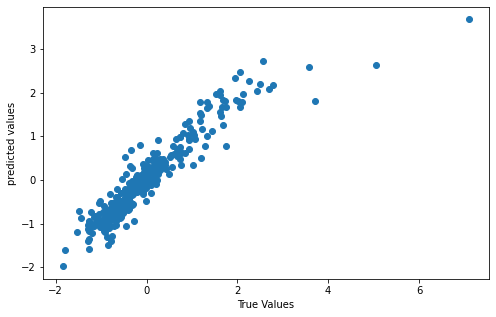

In [113]:
testmodelprodiction.flatten()
plt.figure(figsize=(8,5))
plt.scatter(x=ytest,y=testmodelprodiction)
plt.xlabel('True Values')
plt.ylabel('predicted values')
plt.show()